##  Task 2

All necessary imports of packages and directory path is defined

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
import numpy as np
import numpy
from random import randrange
import matplotlib.patches as patches
from torchvision import datasets
from mpl_toolkits.axes_grid1 import ImageGrid
dataset_path = r"D:\Internships\Applications\Nyris\Nyris_task\CUB_200_2011"

Necessary files are read and the data is saved in a dataframe

In [2]:
with open( os.path.join(dataset_path, 'image_class_labels.txt'),'r') as file:
    #text =[]
    image = []
    image_class_label = []
    for line in file:
        text = line.split()
        image_1 = int(text[0])
        image_class_label_1 = int(text[1])
        image.append(image_1)
        image_class_label.append(image_class_label_1)
        
with open( os.path.join(dataset_path, 'bounding_boxes.txt'),'r') as file:
    x = []
    y = []
    width =[]
    height = []
    for line in file:
        text_1 = line.split()
        x_1 = int(float(text_1[1]))
        y_1 = int(float(text_1[2]))
        width_1 = int(float(text_1[3]))
        height_1 = int(float(text_1[4]))
        x.append(x_1)
        y.append(y_1)
        width.append(width_1)
        height.append(height_1)
        
with open( os.path.join(dataset_path, 'images.txt'),'r') as file:
    image_path = [] 
    for line in file:
        text_2 = line.split()
        i_path = text_2[1]
        image_path.append(i_path)
        
with open( os.path.join(dataset_path, 'classes.txt'),'r') as file:
    classes = [] 
    class_number = []
    for line in file:
        text_3 = line.split()
        class_number_1 = text_3[0]
        classes_1 = text_3[1]
        class_number.append(class_number_1)
        classes.append(classes_1)

class_data = dict(zip(class_number, classes))
list_lables = ['Image', 'Image_class_label', 'x in pixels','y in pixels', 'width in pixels', 'height in pixels', 'Image_path']   
list_col = [image, image_class_label, x, y, width, height, image_path ]
data = dict(zip(list_lables, list_col))
df = pd.DataFrame(data)
#df.info()
df.head(5)

,Image,Image_class_label,x in pixels,y in pixels,width in pixels,height in pixels,Image_path
0,1,1,60,27,325,304,001.Black_footed_Albatross/Black_Footed_Albatr...
1,2,1,139,30,153,264,001.Black_footed_Albatross/Black_Footed_Albatr...
2,3,1,14,112,388,186,001.Black_footed_Albatross/Black_Footed_Albatr...
3,4,1,112,90,255,242,001.Black_footed_Albatross/Black_Footed_Albatr...
4,5,1,70,50,134,303,001.Black_footed_Albatross/Black_Footed_Albatr...


EDA on the created data frame and to analyse image size

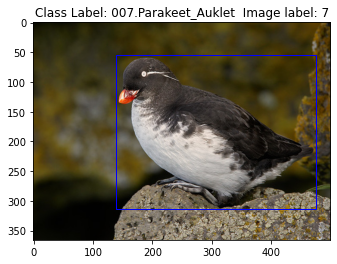

In [3]:
test_image = randrange(1000)
img_path = df['Image_path'][test_image]
img_path = 'images/' + img_path
img_x = df['x in pixels'][test_image]
img_y = df['y in pixels'][test_image]
img_w = df['width in pixels'][test_image]
img_h = df['height in pixels'][test_image]
cl_label = str(df['Image_class_label'][test_image])
img_label = class_data.get(cl_label)
image_brids = plt.imread(os.path.join(dataset_path,img_path))
fig, ax = plt.subplots()
ax.imshow(image_brids)
rect = patches.Rectangle((img_x,img_y),img_w, img_h, linewidth=1, edgecolor='b', facecolor='none')
ax.add_patch(rect)
plt.title("Class Label: %s  Image label: %s" % (img_label, cl_label))
plt.show()

Average height and width of the images: 375.0 500.0


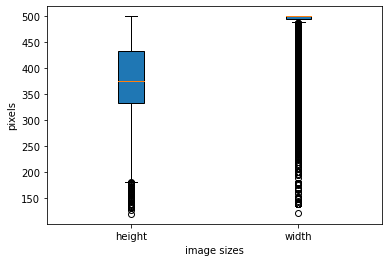

In [7]:
img = datasets.ImageFolder(os.path.join(dataset_path, 'images'))
img_height = []
img_length = []
i = 0
for i,_ in img:
    img_height_1 = i.height
    img_length_1 = i.width
    img_height.append(img_height_1)
    img_length.append(img_length_1)
print("Average height and width of the images: {0} {1}" .format(numpy.median(img_height),numpy.median(img_length)))
fig = plt.figure()
ax = fig.add_subplot(111)

bp = ax.boxplot([img_height, img_length], patch_artist=True)

ax.set_xticklabels(['height', 'width'])
ax.set_xlabel('image sizes')
ax.set_ylabel('pixels')

plt.show()

Splitting the test and the train data set according to "The CUB-200-2011 dataset [37] has 200 classes of birds
with 11,788 images. We split the first 100 classes for training (5,864 images) and the rest of the classes for testing
(5,924 images)." from https://arxiv.org/pdf/1511.06452.pdf

In [8]:
test_data_image =[]
test_data_path = []
test_data_class = []
train_data_image =[]
train_data_path = []
train_data_class = []
j = 0;
for i in df['Image_class_label']:
    if i < 101:
        #print(i)
        train_data_image_1 = df['Image'][j]
        train_data_path_1 = df['Image_path'][j]
        train_class = df['Image_class_label'][j]
        train_data_image.append(train_data_image_1)
        train_data_path.append(train_data_path_1)
        train_data_class.append(train_class)
    elif 101<= i <= 200:
        test_data_image_1 = df['Image'][j]
        test_data_path_1 = df['Image_path'][j]
        test_class = df['Image_class_label'][j]
        test_data_image.append(test_data_image_1)
        test_data_path.append(test_data_path_1) 
        test_data_class.append(test_class)
    j += 1
    
#creating test dataset
test = {'image_id_test': test_data_image, 'class_test': test_data_class,'image_file_path_test':test_data_path}
test_df = pd.DataFrame(test)
test_df.tail(5)
test_df.to_csv(os.path.join(dataset_path, 'test_data.csv'), index = None)

#creating train dataset
train = {'image_id_train': train_data_image, 'class_train': train_data_class,'image_file_path_train':train_data_path}
train_df = pd.DataFrame(train)
train_df.head(5)
train_df.to_csv(os.path.join(dataset_path, 'train_data.csv'), index = None)

,image_id_train,class_train,image_file_path_train
0,1,1,001.Black_footed_Albatross/Black_Footed_Albatr...
1,2,1,001.Black_footed_Albatross/Black_Footed_Albatr...
2,3,1,001.Black_footed_Albatross/Black_Footed_Albatr...
3,4,1,001.Black_footed_Albatross/Black_Footed_Albatr...
4,5,1,001.Black_footed_Albatross/Black_Footed_Albatr...


## Task 3

Before starting second start please install "timm" 

In [16]:
pip install timm

Note: you may need to restart the kernel to use updated packages.


Importing neccessary packages

In [9]:
import torch
import timm
import torch
import torchvision
from torchvision import datasets, transforms, models

loading the test and train dataset before feature extraction

train_data_set size: 5864
torch.Size([4, 3, 375, 375])
test_data_set size: 5924
torch.Size([4, 3, 375, 375])


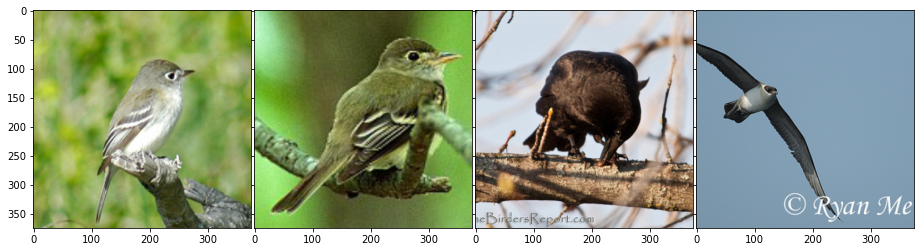

In [11]:
batch_size = 4
num_workers = 4

transforms = transforms.Compose([transforms.Resize(375),
                                       transforms.CenterCrop(375),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406], 
                                                            [0.229, 0.224, 0.225])])

def imshow(axis, inp):
    """Denormalize and show"""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    axis.imshow(inp)


#loading train dataset
train_dataset = datasets.ImageFolder(os.path.join(dataset_path, 'train'), transform=transforms)
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True,num_workers=num_workers)
train_dataset_sizes = len(train_dataset)
train_class_name = train_dataset.classes 
print("train_data_set size:",train_dataset_sizes)
train_inputs, labels = next(iter(train_dataloader))
print(train_inputs.size())
fig = plt.figure(1, figsize=(16, 4))
grid = ImageGrid(fig, 111, nrows_ncols=(1, 4), axes_pad=0.05)    
for i in range(train_inputs.size()[0]):
    ax = grid[i]
    imshow(ax, train_inputs[i])

#loading test dataset
test_dataset = datasets.ImageFolder(os.path.join(dataset_path, 'test'), transform=transforms)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=True,num_workers=num_workers)
test_dataset_sizes = len(test_dataset)
test_class_name = test_dataset.classes 
test_inputs, labels = next(iter(test_dataloader))
print("test_data_set size:",test_dataset_sizes)
print(test_inputs.size())

To extarct features from the dataset ResNet50 is chosen and the data is saved as a numpy file 

In [32]:
inputs = [train_inputs, test_inputs]
path = ['train_features.npy', 'test_features.npy']
i = 0
m = timm.create_model('resnet50', pretrained=True)
for x in inputs:
    print(f'Original shape: {x.shape}')
    o = m.forward_features(x)
    features = o.detach().numpy()
    print(len(features))
    numpy.save(os.path.join(dataset_path, path[i]), features,allow_pickle=True, fix_imports=True)
    i += 1
    print(f'Unpooled shape: {o.shape}')

Original shape: torch.Size([4, 3, 375, 375])
4
Unpooled shape: torch.Size([4, 2048, 12, 12])
Original shape: torch.Size([4, 3, 375, 375])
4
Unpooled shape: torch.Size([4, 2048, 12, 12])


## Task 4

1. List a set of metrics that can be used to evaluate Image Retrieval models. Describe what information each of the listed metrics will convey.



- Precision:

The precision in image retrieval can be defined as: precision is the measurement of the retrieved relevant images to the query of the total retrieved images. 

precision = A/B 

where A is “the relevant retrieved images” and B is “the total retrieved images. 

source: https://www.sciencedirect.com/science/article/pii/S1319157812000444

 - Recall: 
 
The recall in image retrieval can be defined as: Recall is the measurement of the retrieved relevant images to the total   database images. 
 
Recall = A/C
 
where A is “the relevant retrieved images” and C is “the total number of relevant images in the database”.
 
source: https://www.sciencedirect.com/science/article/pii/S1319157812000444

- F-Score:

The precision and recall measure the accuracy of image retrieval with relevancy to the query and database images and always two values are computed to show the effectiveness of image retrieval. However these two measurements cannot be considered as complete accuracy for the effective image retrieval. Hence they can be combined to give a single value that describes the accuracy of image retrieval and this combination is called F-Score or F-measure to measure accuracy. Both precision and recall measurements are combined to compute the score and it is also called as a weighted average or harmonic mean of the precision and recall. F-Score can be defined as:

F = 2 * ((precision * recall)/(precision + recall))

The F-score value is a single value that indicates the overall effectiveness of the image retrieval.

source: https://www.sciencedirect.com/science/article/pii/S1319157812000444

-  Similairity Measurement:

The similarity matrix is used to search similarity between two or more images. In CBIR once features are extracted from respective image, are then stored in feature database to retrieve best results among the database, a similarity matrix is used that calculates similarity among query image and image stored in a database. Various similarity matrix namely Manhattan Distance, Euclidean Distance, Mahalonobis Distance, Min kowshi, Chebychev, Cosine are used.

source: https://ieeexplore.ieee.org/document/9215391


2. Describe how the training and test features (extracted in Task 3) will be used to compute evaluation metrics

Similarity measurement used the vector images to calculate the similiarities between the input image and the images in the dataset. 

The features extracted from the test and the train dataset can be used as the database where the feacture vectors are saved. The features from the input images are extracted then compared with various similarity matrix (Distance metrics) which would then return the results with similar results. 

The samller the difference the two vectors have, the larger similiarities they and samll distance. The vectors with small difference are most similiar to the input image. 